<H>5.1<H>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

def load_data(filename):
  """Loads data from a CSV file and splits it into features and target."""
  data = pd.read_csv(filename)
  X = data['Height'].values.reshape(-1, 1)  # Reshape for sklearn
  y = data['Weight'].values
  return X, y

# Load data
X, y = load_data('HeightWeight.csv')


In [14]:
def ridge_regression_and_plot(X, y, lambdas):
  plt.figure(figsize=(10, 6))

  for lambda_ in enumerate(lambdas):
    ridge_model = Ridge(alpha=lambda_)
    ridge_model.fit(X, y)
    y_pred = ridge_model.predict(X)

    plt.plot(X, y_pred, label=f'lambda={lambda_}')
    print(f"Slope for lambda={lambda_}: {ridge_model.coef_[0]}")

  plt.scatter(X, y, color='black', label='Data')
  plt.xlabel('Height')
  plt.ylabel('Weight')
  plt.legend()
  plt.title('Ridge Regression Models')
  plt.show()

Slope for lambda=100: 1.3780052819518878
Slope for lambda=10000: 1.363867725088684
Slope for lambda=1000000: 0.673201234065182
Slope for lambda=100000000: 0.0130363580588361


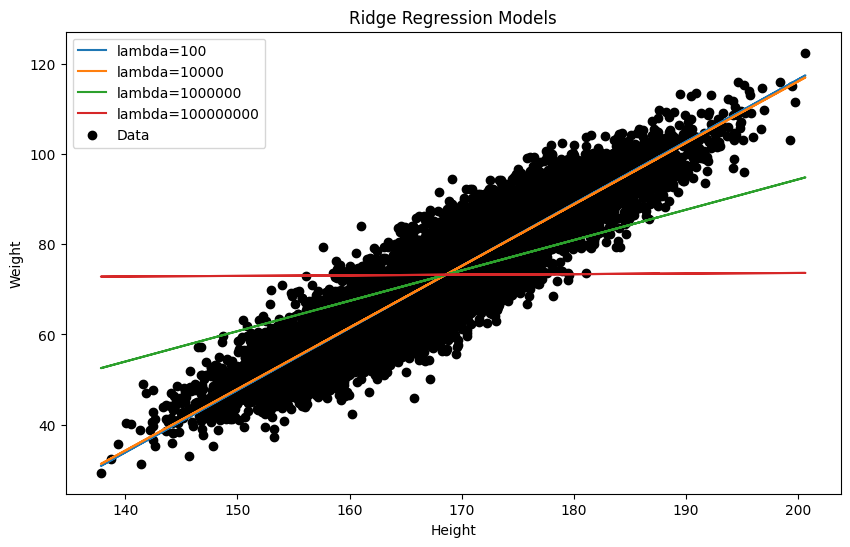

In [55]:
def main():
  filename = 'HeightWeight.csv'
  X, y = load_data(filename)
  lambdas = [10**2, 10**4, 10**6, 10**8]  # Adjust lambda values as needed
  slope_values = np.linspace(-2, 2, 100)
  ridge_regression_and_plot(X, y, lambdas)

if __name__ == '__main__':
  main()


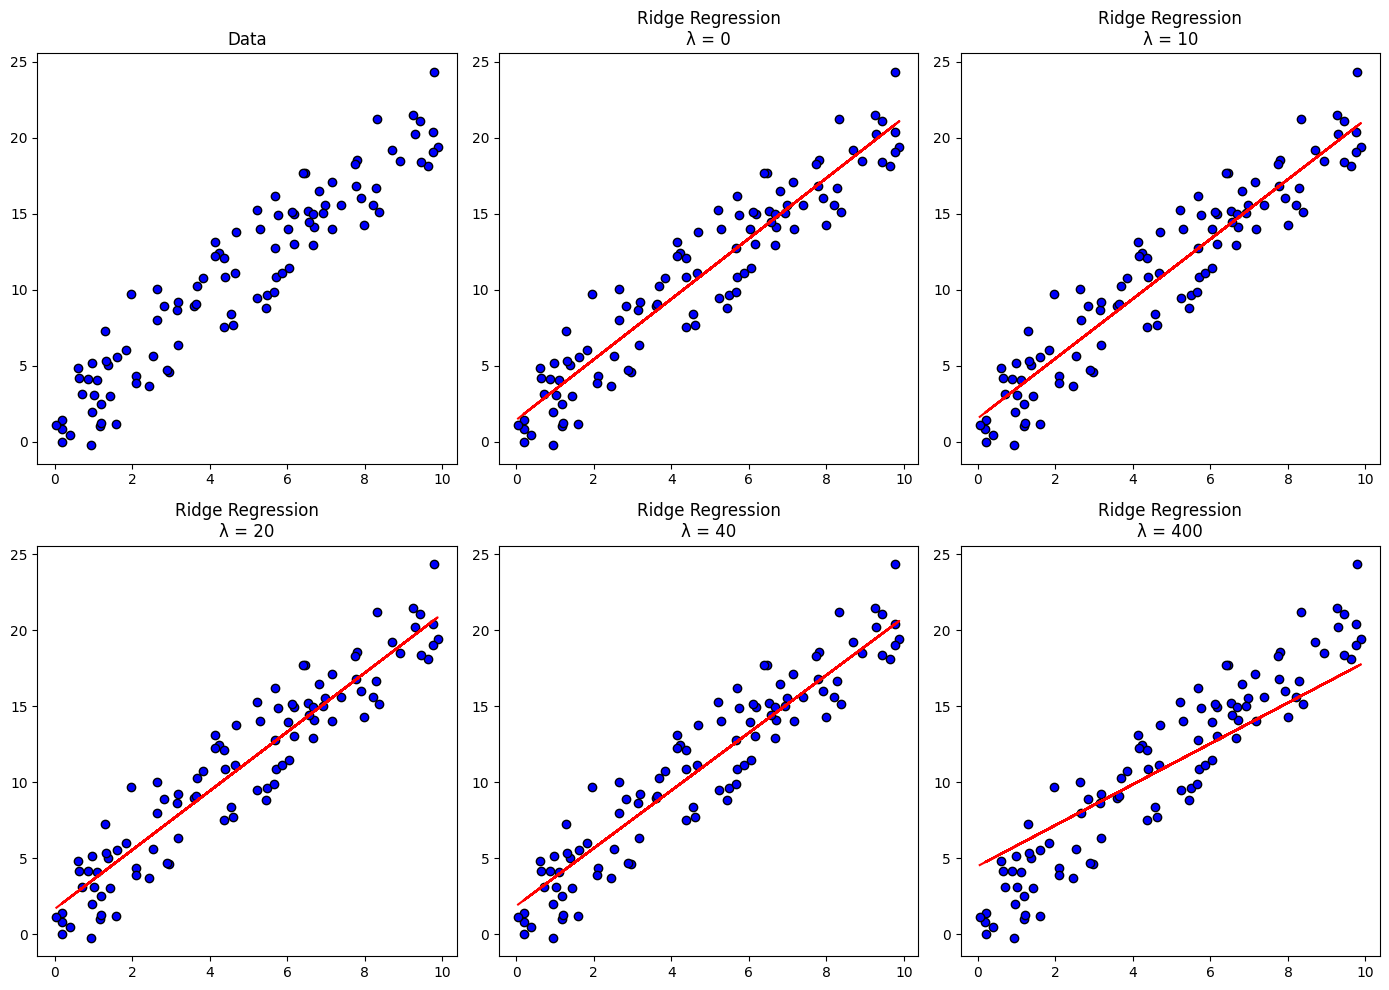

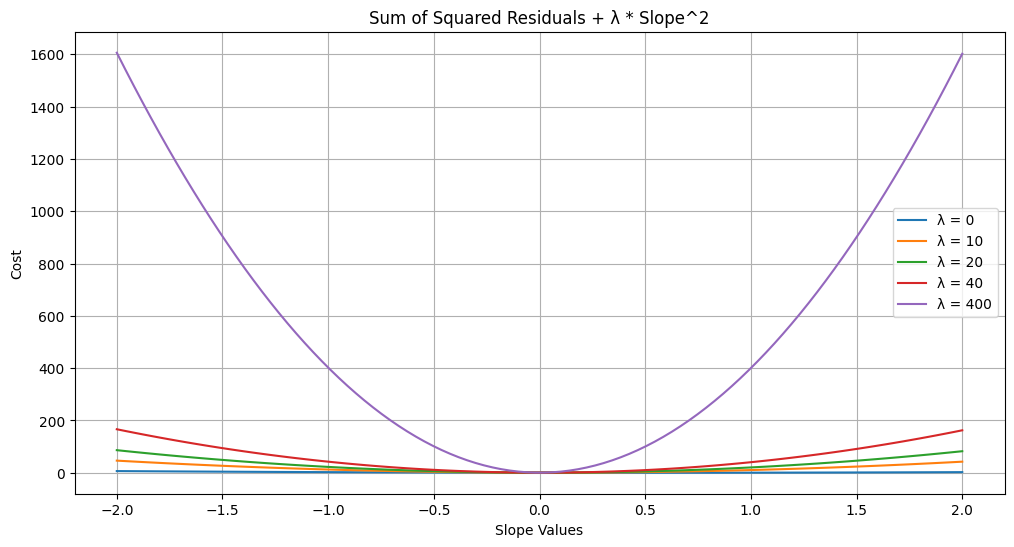

In [59]:


def predict(X, b0, b1):
    return [b0 + b1 * x for x in X]

plt.figure(figsize=(14, 10))
plt.subplot(2, 3, 1)
plt.scatter(X, y, color='blue', edgecolor='k')
plt.title('Data')

alphas = [0, 10, 20, 40, 400]
slope_values = np.linspace(-2, 2, 100)

plt.figure(figsize=(12, 6))
for alpha in alphas:
    cost_ridge = [(slope - 0.5) ** 2 + alpha * slope ** 2 for slope in slope_values]
    plt.plot(slope_values, cost_ridge, label=f'λ = {alpha}')

plt.title('Sum of Squared Residuals + λ * Slope^2')
plt.xlabel('Slope Values')
plt.ylabel('Cost')
plt.legend()
plt.grid(True)
plt.show()


<H>5.2<H>

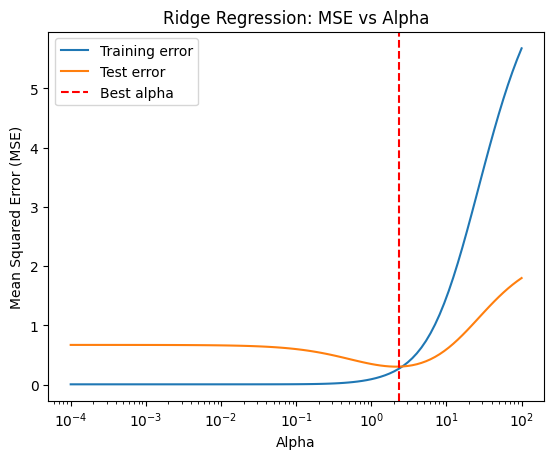

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Sample data (replace with your data)
data = {'X1': [1, 2, 3, 4, 5],
        'X2': [2, 4, 5, 4, 5],
        'y': [7, 10, 13, 12, 14]}
df = pd.DataFrame(data)

# Split data into features (X) and target variable (y)
X = df[['X1', 'X2']]
y = df['y']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Range of alpha values to explore
alpha_values = np.logspace(-4, 2, 100)

# Initialize lists to store SSR values
train_error = []
test_error = []

# Loop through alpha values
for alpha in alpha_values:
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)

    # Calculate mean squared error (MSE) on training and test sets
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    train_error.append(mean_squared_error(y_train, train_pred))
    test_error.append(mean_squared_error(y_test, test_pred))

# Find the index of the minimum test error
best_alpha_index = np.argmin(test_error)

# Plot the SSR curve
plt.plot(alpha_values, train_error, label='Training error')
plt.plot(alpha_values, test_error, label='Test error')
plt.axvline(x=alpha_values[best_alpha_index], color='red', linestyle='--', label='Best alpha')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Ridge Regression: MSE vs Alpha')
plt.legend()
plt.show()
